In [ ]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib


In [ ]:
df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Cell 3: Basic info
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

# Display column types
df.info()

# Statistical summary
df.describe()

Shape: (4600, 18)

Missing values per column:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   co

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# Cell 4: Feature Engineering

current_year = datetime.datetime.now().year

# Create house age
df["house_age"] = current_year - df["yr_built"]

# Years since renovation
df["years_since_renovation"] = np.where(df["yr_renovated"] == 0,
                                        0,
                                        current_year - df["yr_renovated"])

# Drop unused columns
drop_cols = ["date", "yr_built", "yr_renovated", "street", "country"]
df = df.drop(columns=drop_cols)

# Handle missing values (if any)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical features
label_enc = LabelEncoder()
for col in ["city", "statezip"]:
    df[col] = label_enc.fit_transform(df[col])

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,house_age,years_since_renovation
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,36,62,70,20
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,35,58,104,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,18,26,59,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,3,7,62,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,31,31,49,33


In [ ]:
# Cell 5: Remove extreme luxury houses (price > 5 million)
df = df[df["price"] < 5000000]
print("New dataset shape:", df.shape)


New dataset shape: (4597, 15)


In [ ]:
# Cell 6: Split into features & target
X = df.drop("price", axis=1)
y = df["price"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (3677, 14)
Testing set: (920, 14)


In [ ]:
# Cell 7: Train models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.2f}")

    # Save model
    joblib.dump(model, f"{name.replace(' ', '_')}.pkl", protocol=4)


Linear Regression: RMSE=231987.98, R²=0.54
Random Forest: RMSE=206921.57, R²=0.63
Gradient Boosting: RMSE=199370.09, R²=0.66


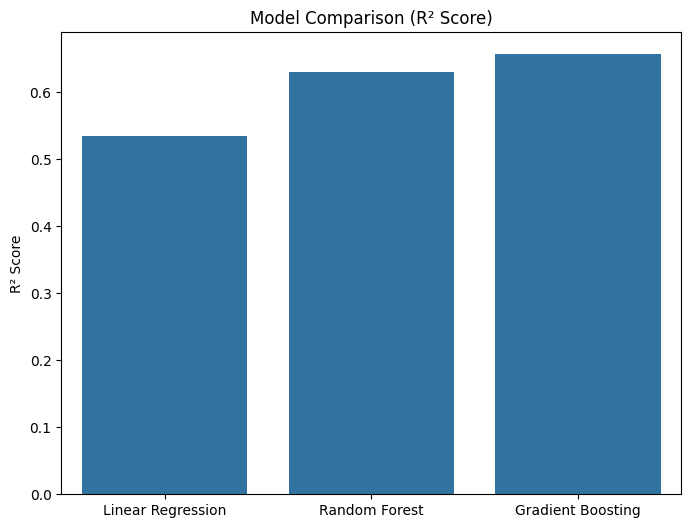

,RMSE,R2
Linear Regression,231987.981112,0.535532
Random Forest,206921.566093,0.630481
Gradient Boosting,199370.091771,0.656960


In [ ]:
# Cell 8: Visualize model comparison
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=[v["R2"] for v in results.values()])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

pd.DataFrame(results).T


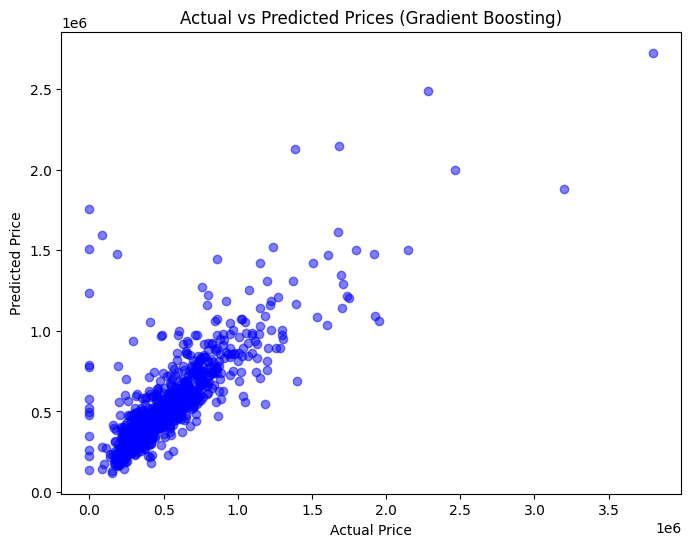

In [ ]:
# Cell 9: Plot Actual vs Predicted
best_model_name = max(results, key=lambda k: results[k]["R2"])
best_model = joblib.load(f"{best_model_name.replace(' ', '_')}.pkl")

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.show()
